**Settings: Where applicable, use test_size=.30, random_state=4444. This will permit comparison of results across users.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import metrics

from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Challenge 1

Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.

In [2]:
votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [3]:
votes = votes.replace({'y':1,'n':0,'?':np.nan})
votes.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


Now, almost every representative has a ?. This represents the absence of a vote (they were absent or some other similar reason). If we dropped all the rows that had a ?, we would throw out most of our data. Instead, we will replace ? with the best guess in the Bayesian sense: in the absence of any other information, we will say that the probability of the representative saying YES is the ratio of others that said YES over the whole votes.

So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)

In [4]:
for i in votes.columns[1:]:
    votes[[i]] = votes[[i]].fillna(votes[[i]].mean())

## Challenge 2

Split the data into a test and training set.

In [5]:
X, y = votes.drop(0,axis=1), votes[0].replace({'democrat':1,'republican':0})

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state=4444)


## Challenge 3

Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat):

Try it with a lot of different k values (number of neighbors), from 1 to 20, and on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k

Which k value gives the highest accuracy?

The K which gives the highest accuracy is 9 with an efficiency of 0.931298


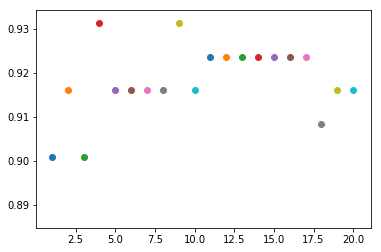

In [6]:
scores = []
y_preds = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    y_preds.append(y_pred)
    scores.append(((metrics.accuracy_score(y_test, y_pred)),i))

for i,j in scores:
    plt.scatter(j,i)
    
print('The K which gives the highest accuracy is %d with an efficiency of %f' %(max(scores)[1], max(scores)[0]))

## Challenge 4

Make a similar model but with LogisticRegression instead, calculate test accuracy.

In [7]:
lm1 = LogisticRegression(C=1000, solver='liblinear',multi_class='auto')
lm1.fit(X_train, y_train)
y_pred = lm1.predict(X_test)
print('Logistic Regression Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

Logistic Regression Accuracy Score:  0.931297709924


In [8]:
print('Logistic Regression Precision: ',metrics.precision_score(y_test, y_pred))
print('Logistic Regression Recall: ', metrics.recall_score(y_test,y_pred))
print('Logistic Regression AUC: ', metrics.roc_auc_score(y_test,y_pred))
print('Logistic Regression F1: ', metrics.f1_score(y_test, y_pred))

Logistic Regression Precision:  0.925
Logistic Regression Recall:  0.961038961039
Logistic Regression AUC:  0.924963924964
Logistic Regression F1:  0.942675159236


## Challenge 5

Make a bar graph of democrats and republicans. How many of each are there?

Text(0.5, 1.0, 'Number of republican vs democrats')

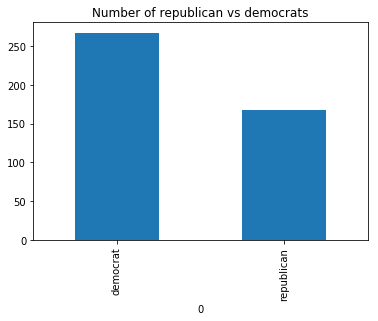

In [9]:
votes[[1]].groupby(votes[0]).count().plot.bar(legend=False)
plt.title('Number of republican vs democrats')



Make a very simple predictor that predicts 'democrat' for every incoming example.

Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy.

Do the same with predicting 'republican' all the time and measure its accuracy.

In [10]:
dem_rep = pd.DataFrame(votes[0])
dem_rep['y_pred_democrats'] = 'democrat'
dem_rep['y_pred_republicans'] = 'republican'

In [11]:
print('democrats pred accuracy: ',metrics.accuracy_score(dem_rep[0], dem_rep['y_pred_democrats']))

democrats pred accuracy:  0.613793103448


In [12]:
print('republicans pred accuracy: ',metrics.accuracy_score(dem_rep[0], dem_rep['y_pred_republicans']))

republicans pred accuracy:  0.386206896552


## Challenge 6

Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

In [13]:
knn_scores = []
dem_scores = []
rep_scores = []
for i,j in scores:
    knn_scores.append(i)
    dem_scores.append(metrics.accuracy_score(dem_rep[0], dem_rep['y_pred_democrats']))
    rep_scores.append(metrics.accuracy_score(dem_rep[0], dem_rep['y_pred_republicans']))

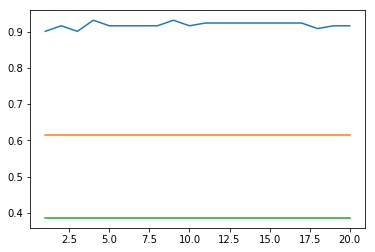

In [14]:
plt.plot(range(1,21),knn_scores)
plt.plot(range(1,21),dem_scores)
plt.plot(range(1,21),rep_scores)

## Challenge 7

Plot a learning curve for the logistic regression model. 

This will give you the m, training errors and testing errors. All you need to do is plot them. You don't even need to give it separate training/test sets. It will do crossvalidation all by itself. Easy, isn't it? : ) Remember, since it does cross-validation, it doesn't have a single training error or test error per m value. Instead, it has one for each fold (separate partition) of the cross validation. A good idea is to take the mean of these errors from different folds. This gives you a meaningful single number per m. What I mean is that doing something like:

In [15]:
X, y = votes.drop(0,axis=1), votes[0]

y = y.replace({"democrat":1,"republican":0})

In [16]:
lc = learning_curve(lm1,X = X, y=y, cv=5, n_jobs=5)
train_err = lc[1]
ts_err = lc[2]

Text(0.5, 1.0, 'Learning curve Logistic Regression')

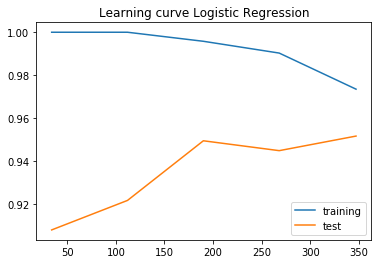

In [17]:
train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

plt.plot(lc[0],train_cv_err,label='training')
plt.plot(lc[0],test_cv_err,label='test')
plt.legend()
plt.title('Learning curve Logistic Regression')

Draw the learning curve for KNN with the best k value as well.

Text(0.5, 1.0, 'Learning curve KNN, k = 9')

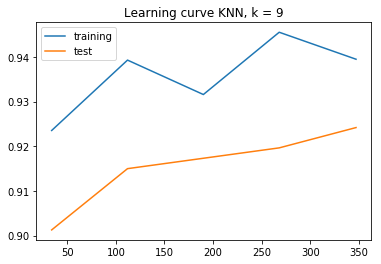

In [18]:
knn = KNeighborsClassifier(n_neighbors=max(scores)[1])

lc_knn = learning_curve(knn,X = X, y=y,cv=5)
train_err = lc_knn[1]
ts_err = lc_knn[2]

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

plt.plot(lc[0],train_cv_err,label='training')
plt.plot(lc[0],test_cv_err,label='test')
plt.legend()
plt.title('Learning curve KNN, k = %d' %(max(scores)[1]))

----
Draw the ROC curve and calculate the AUC.

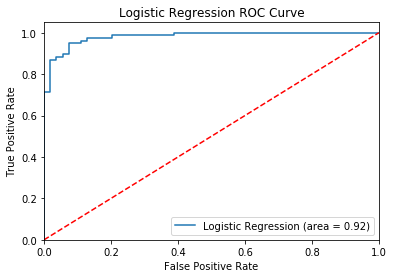

In [19]:
# Roc Curve
logit_roc_auc = roc_auc_score(y_test, lm1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

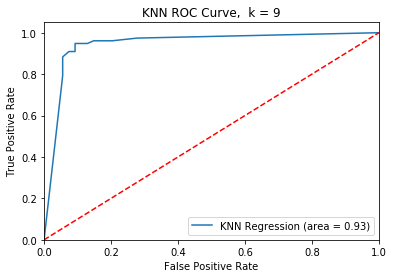

In [20]:
knn.fit(X_train,y_train)

# Roc Curve
knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN Regression (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve,  k = %d' %(max(scores)[1]) )
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Challenge 8

This is a preview of many other classification algorithms that we will go over. Scikit.learn has the same interface for all of these, so you can use them exactly the same way as you did LogisticRegression and KNeighborsClassifier. Use each of these to classify your data and print the test accuracy of each:


In [21]:
m1 = GaussianNB()
m1.fit(X_train,y_train)
print("Gaussian NB:", m1.score(X_test,y_test))

m2 = SVC(gamma='auto')
m2.fit(X_train,y_train)
print("SVC:", m2.score(X_test,y_test))

m3 = DecisionTreeClassifier()
m3.fit(X_train,y_train)
print("Decision Tree:", m3.score(X_test,y_test))

m4 = RandomForestClassifier()
m4.fit(X_train,y_train)
print("Random Forest:", m4.score(X_test,y_test))

Gaussian NB: 0.93893129771
SVC: 0.954198473282
Decision Tree: 0.954198473282
Random Forest: 0.93893129771


/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
y_pred_m1 = m1.predict(X_test)
y_pred_m2 = m2.predict(X_test)
y_pred_m3 = m3.predict(X_test)
y_pred_m4 = m4.predict(X_test)

for name, y_pred in zip(['Gaussian: ','SVC: ','Decision Tree: ','Random Fores: '],[y_pred_m1, y_pred_m2, y_pred_m3, y_pred_m4]):
    print(name)
    print('Precision: ',metrics.precision_score(y_test, y_pred))
    print('Recall: ', metrics.recall_score(y_test,y_pred))
    print('AUC: ', metrics.roc_auc_score(y_test,y_pred))
    print('F1: ', metrics.f1_score(y_test, y_pred))
    print(" ")

Gaussian: 
Precision:  0.915662650602
Recall:  0.987012987013
AUC:  0.928691678692
F1:  0.95
 
SVC: 
Precision:  0.949367088608
Recall:  0.974025974026
AUC:  0.949975949976
F1:  0.961538461538
 
Decision Tree: 
Precision:  0.949367088608
Recall:  0.974025974026
AUC:  0.949975949976
F1:  0.961538461538
 
Random Fores: 
Precision:  0.936708860759
Recall:  0.961038961039
AUC:  0.934223184223
F1:  0.948717948718
 


## Challenge 9

There is actually a way to do cross validation quickly to get your accuracy results for an algorithm, without separating training and test yourself:

Just like the learning_curve function, this takes a classifier object, X and Y. Returns accuracy (or whatever score you prefer by using the scoring keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns.

Use this function to calculate the cross validation score of each of the classifiers you tried before.

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
for name, model in zip(["Gaussian NB:", "SVC:", "Decision Tree:", "Random Forest:"],[m1,m2,m3,m4]):
    print(name)
    print("Accuracy:", cross_val_score(model,X,y, cv=5), "Mean: ",np.mean(cross_val_score(model,X,y, cv=5)))
    print("Precision:", cross_val_score(model,X,y, scoring='precision', cv=5), "Mean: ",np.mean(cross_val_score(model,X,y,scoring='precision', cv=5)))
    print("Recall:", cross_val_score(model,X,y, scoring='recall', cv=5), "Mean: ",np.mean(cross_val_score(model,X,y,scoring='recall', cv=5)))
    print("F1:", cross_val_score(model,X,y, scoring='f1', cv=5), "Mean: ",np.mean(cross_val_score(model,X,y,scoring='f1', cv=5)))
    print('')

Gaussian NB:
Accuracy: [ 0.94318182  0.95454545  0.94252874  0.98837209  0.87209302] Mean:  0.940144224928
Precision: [ 0.98039216  0.96296296  0.92857143  0.98148148  0.9375    ] Mean:  0.958181605976
Recall: [ 0.92592593  0.96296296  0.98113208  1.          0.8490566 ] Mean:  0.943815513627
F1: [ 0.95238095  0.96296296  0.95412844  0.99065421  0.89108911] Mean:  0.950243134046

SVC:
Accuracy: [ 0.95454545  0.96590909  0.95402299  0.98837209  0.90697674] Mean:  0.953965274234
Precision: [ 0.98076923  0.98113208  0.94545455  1.          0.9787234 ] Mean:  0.97721585119
Recall: [ 0.94444444  0.96296296  0.98113208  0.98113208  0.86792453] Mean:  0.947519217331
F1: [ 0.96226415  0.97196262  0.96296296  0.99047619  0.92      ] Mean:  0.961533184241

Decision Tree:
Accuracy: [ 0.96590909  0.93181818  0.96551724  0.90697674  0.91860465] Mean:  0.940090763286
Precision: [ 0.96363636  1.          0.96296296  0.92592593  0.9245283 ] Mean:  0.962207105064
Recall: [ 0.94444444  0.88888889  0.981

## Challenge 10

Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

Reload the data from scratch. Convert y-->1, n-->0.

In [25]:
votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',header=None)

In [26]:
votes = votes.replace({'y':1,'n':0,'?':np.nan})

Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).



In [27]:
for i in votes.columns:
    votes[[i]] = votes[[i]].fillna(votes[i].mode()[0])

Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.


Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.




In [28]:
X, y = votes.drop([0,1],axis=1), votes[1]

In [29]:
lm1.fit(X,y)

print(cross_val_score(lm1,X,y, cv=5),np.mean(cross_val_score(lm1,X,y,cv=5)))

[ 0.80681818  0.54545455  0.71264368  0.62790698  0.6744186 ] 0.673448397366


## Challenge 11

Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

In [30]:
movies = pd.read_csv('/Users/lailasprejer/metis/metisgh/nyc18_ds17/challenges/challenges_data/2013_movies.csv')

In [31]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

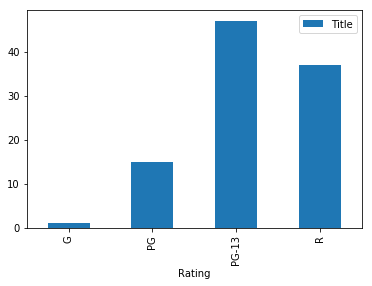

In [32]:
movies[['Title','Rating']].groupby('Rating').count().plot.bar()

Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.



In [33]:
movies = movies.dropna()
X, y = movies[['Budget','Runtime']], movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size = 0.3, random_state=4444)

In [34]:
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
print('Logistic Regression Accuracy:', metrics.accuracy_score(y_test,y_pred))

Logistic Regression Accuracy: 0.407407407407


In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('KNN Accuracy:', metrics.accuracy_score(y_test,y_pred))

KNN Accuracy: 0.444444444444


-----
Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

How much better do KNN and logistic regression do versus the baseline?

What are the coefficients of logistic regression? Which features affect the outcome how?

In [36]:
y_stupid = []
for i in y_test:
    y_stupid.append('PG-13')
    
print('Stupid predictor accuracy: ',metrics.accuracy_score(y_test,y_stupid))

Stupid predictor accuracy:  0.407407407407


In [37]:
lm1.coef_

array([[ -1.72122763e-08,  -6.88037279e-14],
       [  6.18347646e-09,  -1.33242194e-14],
       [ -1.50846101e-08,   2.17315034e-14]])

## Challenge 12

Now you are a classification master. The representative votes dataset only had 0s and 1s. Let's just swiftly tackle the breast cancer surgery data.

Get it from here: Haberman Survival Dataset




In [38]:
breast = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',names=['Age','Year_Operation','Nodes','Survival'])

In [39]:
breast.head()

,Age,Year_Operation,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Features description:**
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year
----

What is the average and standard deviation of the age of all of the patients?

What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?

What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?

In [40]:
print('Age Mean and STD: ', breast['Age'].mean(),breast['Age'].std())
print('Age Mean and STD Survived > 5: ', breast[breast['Survival']==1]['Age'].mean(),breast[breast['Survival']==1]['Age'].std())
print('Age Mean and STD Survived < 5: ', breast[breast['Survival']==2]['Age'].mean(),breast[breast['Survival']==2]['Age'].std())

Age Mean and STD:  52.45751633986928 10.80345234930328
Age Mean and STD Survived > 5:  52.01777777777778 11.012154179929546
Age Mean and STD Survived < 5:  53.67901234567901 10.16713720829741


----
Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
What is the earliest year of surgery in this dataset?
What is the most recent year of surgery?


Earliest year of surgery:  1958
Most recent year of surgery:  1969


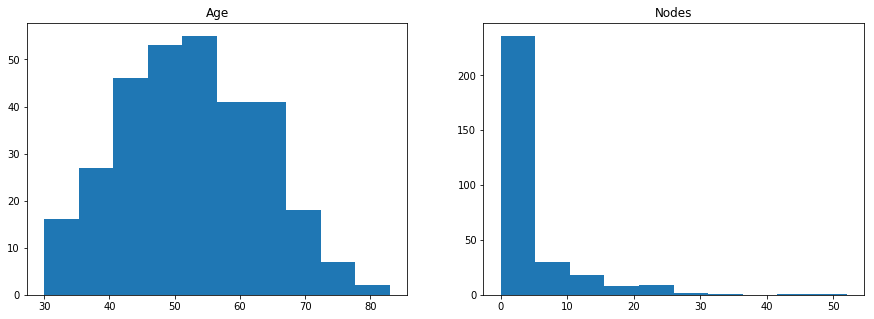

In [41]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1) # (number of rows, number of columns (or plots), number of plot to manipulate)
plt.hist(breast['Age'])
plt.title('Age')

plt.subplot(1,2,2)
plt.hist(breast['Nodes'])
plt.title('Nodes');

print('Earliest year of surgery: ', 1900 + breast[['Year_Operation']].min()[0])
print('Most recent year of surgery: ', 1900 + breast[['Year_Operation']].max()[0])

---
Use logistic regression to predict survival after 5 years. 

How well does your model do?

In [42]:
X,y = breast.drop('Survival',axis=1), breast['Survival']

In [43]:
y = y.apply(lambda x: 1 if x ==1 else 0)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size = 0.3, random_state=4444)

In [45]:
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.83695652173913049

----
What are the coefficients of logistic regression? Which features affect the outcome how?

In [46]:
for i,j in zip(X.columns,lm1.coef_[0]):
    print(i,j)

Age -0.0174511844884
Year_Operation -0.00598170511201
Nodes -0.0719499694559


----
Draw the learning curve for logistic regression in this case

Text(0.5, 1.0, 'Learning curve Logistic Regression')

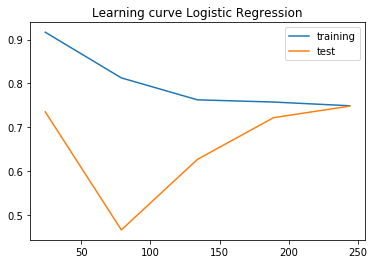

In [47]:
lc = learning_curve(lm1,X = X, y=y,cv=5)
train_err = lc[1]
ts_err = lc[2]

train_cv_err = np.mean(train_err, axis=1)
test_cv_err = np.mean(ts_err, axis=1)

plt.plot(lc[0],train_cv_err,label='training')
plt.plot(lc[0],test_cv_err,label='test')
plt.legend()
plt.title('Learning curve Logistic Regression')

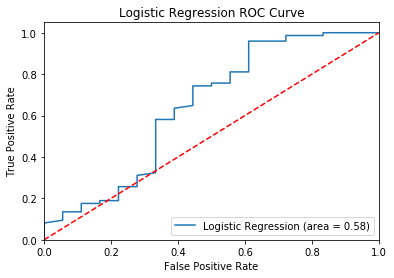

In [48]:
# Roc Curve
logit_roc_auc = roc_auc_score(y_test, lm1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()